In [9]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
! pip install plotly
%matplotlib inline

In [15]:
df = pd.read_csv('test_1.csv', delimiter=',')
df.tail()

,group,client_id,target
1993,control,1994,50.207788
1994,control,1995,51.715447
1995,control,1996,56.551077
1996,control,1997,47.178478
1997,control,1998,49.434447


In [12]:
import numpy as np
from scipy.stats import norm

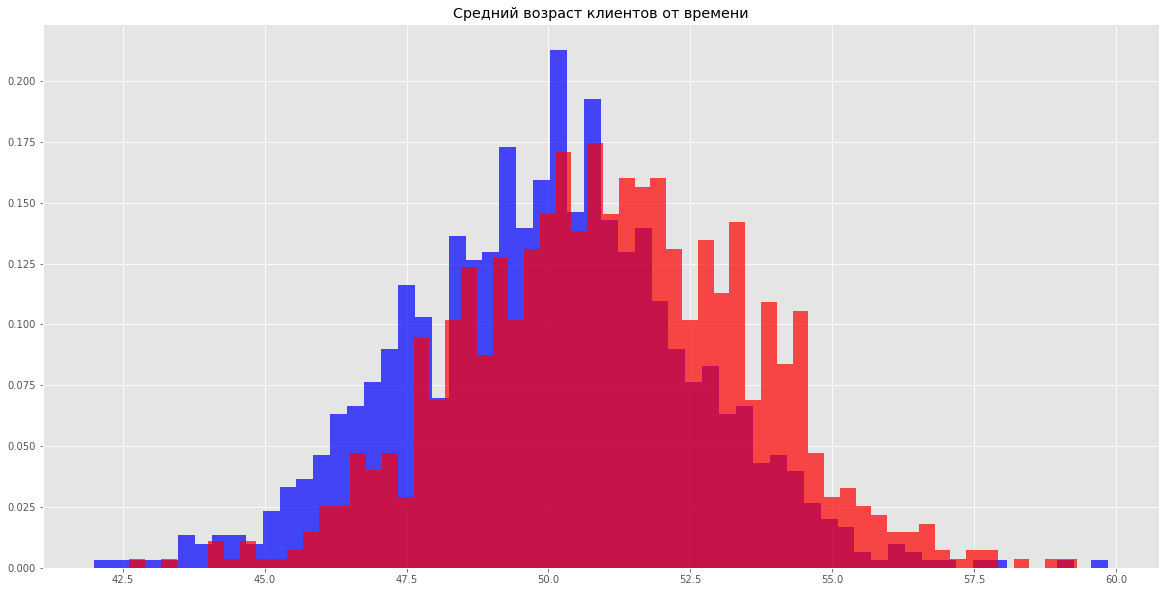

In [32]:
x = df['target'].where(df['group']=='test')
y = df['target'].where(df['group']=='control')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Средний возраст клиентов от времени')
plt.hist(x, bins=60, density=True, color='blue', alpha=0.7)
plt.hist(y, bins=60, density=True, color='red', alpha=0.7)
plt.show()

In [34]:
pd.Series(y).describe()

count    988.000000
mean      51.067379
std        2.494937
min       42.619871
25%       49.359982
50%       51.054145
75%       52.783806
max       59.302867
Name: target, dtype: float64

In [35]:
pd.Series(x).describe()

count    1010.000000
mean       49.958944
std         2.520036
min        41.987265
25%        48.326307
50%        50.050681
75%        51.570151
max        59.856546
Name: target, dtype: float64

In [41]:
((y.std())**2)/y.count()

0.006300312176125782

In [46]:
(x.median() - y.median())*(((((y.std())**2)/y.count()) + ((x.std())**2)/x.count())**(-0.5))

-8.94382043707529

In [47]:
from statsmodels.stats import weightstats as stests

In [51]:
mu_x = x.median()
mu_y = y.median()
res = stests.ztest(x, y, alternative='two-sided', value=mu_x-mu_y, ddof=1.0)
print("Z-statistic:", res[0])
print("P-value:", res[1])

Z-statistic: nan
P-value: nan
